In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



# postprocessing of prediction results
This file shows how to post-process prediction results


In [2]:


from ai4water import Model
from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
model = Model(model="XGBRegressor")


            building ML model for  
            regression problem using XGBRegressor


In [5]:
h = model.fit(data=busan_beach())


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (31, 13)
target shape:  (31, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (66, 13)
target shape:  (66, 1)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


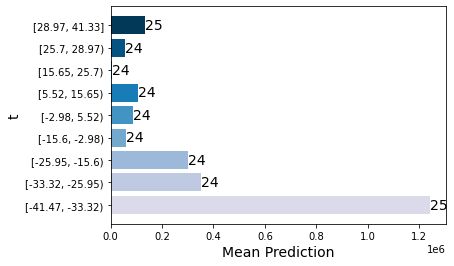

<AxesSubplot:xlabel='Mean Prediction', ylabel='t'>

In [6]:
model.prediction_analysis(features="tide_cm", data=busan_beach(), 
                          show_percentile=True)

In [7]:
data = busan_beach()
x, y = data.iloc[:, 0:-1].values, data.iloc[:, -1].values
x.shape, y.shape

((1446, 13), (1446,))

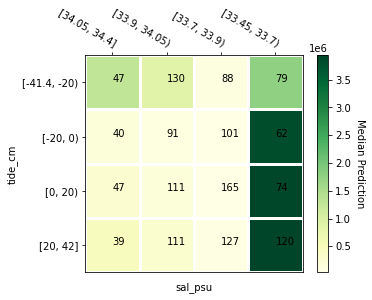

In [8]:
ax = model.prediction_analysis(
    features=['tide_cm', 'sal_psu'],
    x=x, 
    y=y,
    annotate_kws = {
        "annotate_counts":True,
        "annotate_colors":("black", "black"),
        "annotate_fontsize":10
    },
    custom_grid=[[-41.4, -20.0, 0.0, 20.0, 42.0],
                      [33.45, 33.7, 33.9, 34.05, 34.4]],
    border=True
)
